# **Exploratory Data Analysis on Medical Premium Dataset**

## 1) Data Preparation and Cleaning
>
> -  Try to know more about the dataset given,
>
> -  handle the missing values(if any),
>
> -  then load the final dataset into pandas df.

In [1]:
import pandas as pd
import os

In [2]:
os.listdir()

['EDA_on_MedicalPremium.ipynb', 'Medicalpremium.csv']

In [3]:
medical_df = pd.read_csv("Medicalpremium.csv")

In [4]:
medical_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
# Changing some column types to object, as they only contains 1/0 data in them.
for i in medical_df[['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]:
    medical_df[i]=medical_df[i].astype('object')

In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    object
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.9+ KB


## 2) Exploratory Analysis and Visualization

> - Compute the mean, sum, range and other interesting statistics for numeric columns
>
> - Explore distributions of numeric columns using histograms etc.
>
> - Explore relationship between columns using scatter plots, bar charts etc.
>
> - Make a note of interesting insights from the exploratory analysis.

So let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [8]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### A) Visualization for Diabetes, any deseases, surgeries, etc


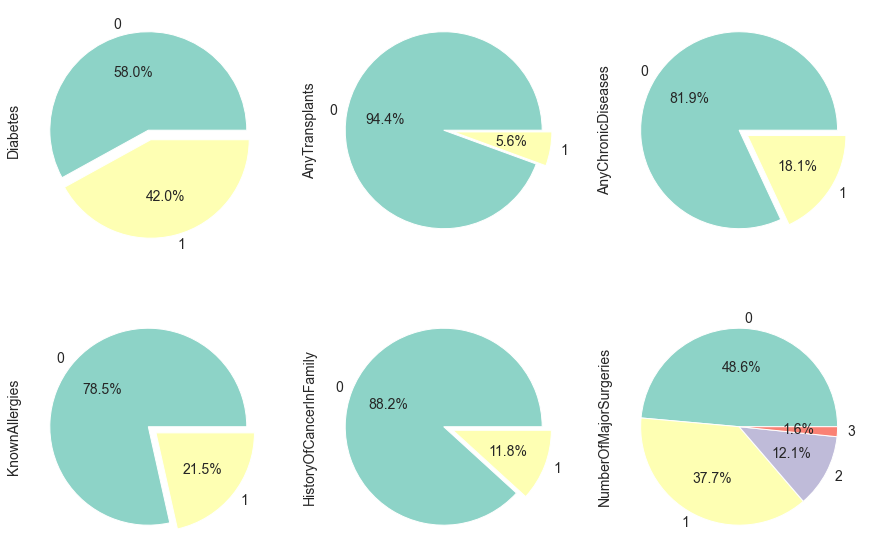

In [91]:
sns.set_style('whitegrid')
f,ax=plt.subplots(2,3,figsize=(15,10))
medical_df['Diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][0])
medical_df['AnyTransplants'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][1])
medical_df['AnyChronicDiseases'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][2])
medical_df['KnownAllergies'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1][0])
medical_df['HistoryOfCancerInFamily'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1][1])
medical_df['NumberOfMajorSurgeries'].value_counts().plot.pie(explode=[0,0,0,0],autopct='%1.1f%%',ax=ax[1][2])
plt.show()

### B) Visualization for Age

#### How age affects the Premium price paid by user

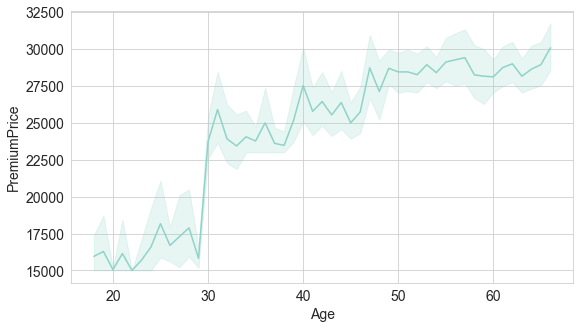

In [82]:
sns.lineplot(x=medical_df["Age"],y=medical_df["PremiumPrice"])
plt.show()

In [42]:
new_df = medical_df.groupby("Age").sum()[["PremiumPrice"]]
new_df2 = new_df.reset_index()
print(new_df2.head())
print()
maxValueIndex = new_df2[["PremiumPrice"]].idxmax()
minValueIndex = new_df2[["PremiumPrice"]].idxmin()
print("Maximum Primium of {Rs." + str(new_df2["PremiumPrice"].max())+ "} is paid by the users of age", new_df2.iloc[maxValueIndex]["Age"].values[0], "years old.")
print()
print("Minimum Primium of {Rs." + str(new_df2["PremiumPrice"].min())+ "} is paid by the users of age", new_df2.iloc[minValueIndex]["Age"].values[0], "years old.")

   Age  PremiumPrice
0   18        367000
1   19        342000
2   20        256000
3   21        339000
4   22        285000

Maximum Primium of {Rs.766000} is paid by the users of age 43 years old.

Minimum Primium of {Rs.204000} is paid by the users of age 23 years old.


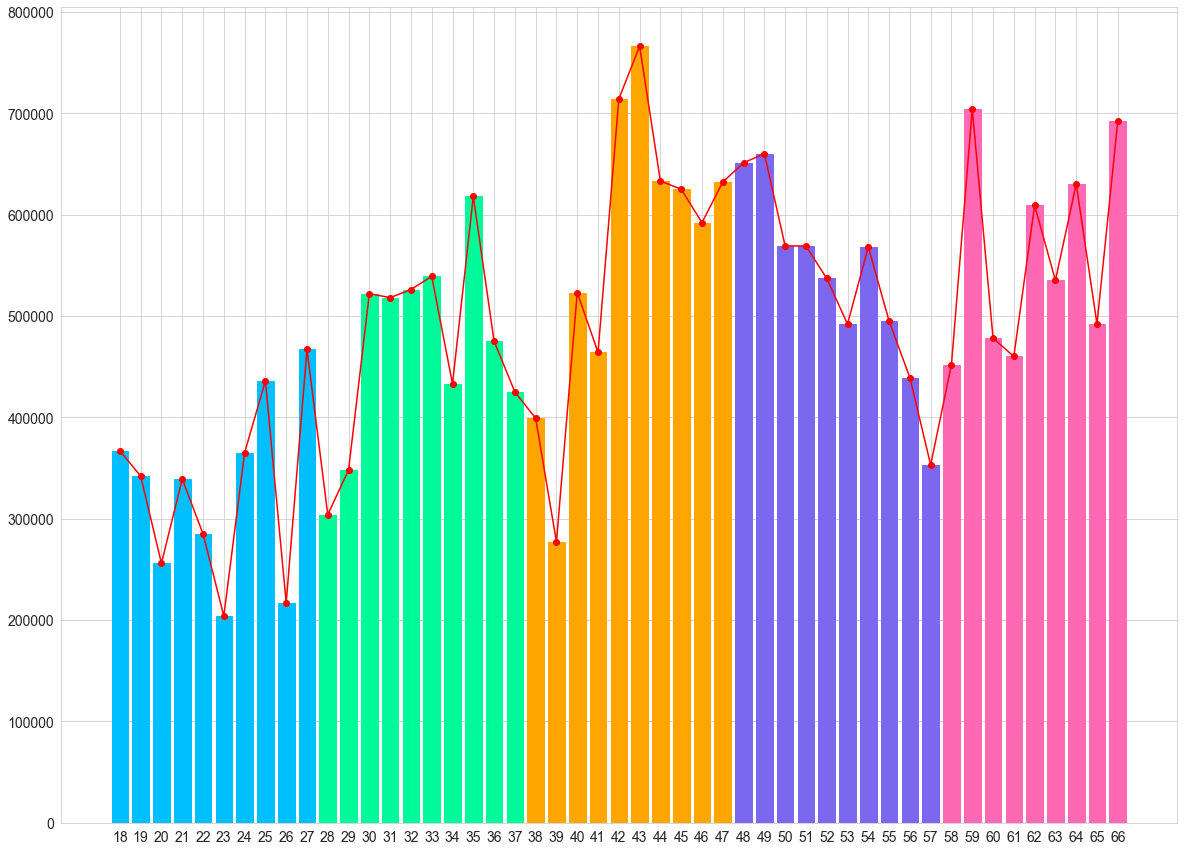

In [43]:
plt.figure(figsize=(20,15))
plt.plot(new_df2["Age"],new_df2["PremiumPrice"],marker='o',color="r")
barlist = plt.bar(new_df2["Age"],new_df2["PremiumPrice"])
for i in range(len(barlist)):
    if i<10:
        barlist[i].set_color("deepskyblue")
    elif i>=10 and i<20:
        barlist[i].set_color("mediumspringgreen")
    elif i>=20 and i<30:
        barlist[i].set_color("orange")
    elif i>=30 and i<40:
        barlist[i].set_color("mediumslateblue")
    else:
        barlist[i].set_color("hotpink")
plt.xticks(new_df2["Age"])
plt.show()

### C) Visualization for Obesity

#### How Obesity affects the Premium price paid by user

In [18]:
new_df = medical_df
# BMI = weight(in kg) / height(in m)**2
new_df.loc[(new_df["Weight"]/(((new_df["Height"])/100)**2)) >= 25,"Obesity"] = 1
new_df.loc[(new_df["Weight"]/(((new_df["Height"])/100)**2)) < 25,"Obesity"] = 0
new_df2 = new_df[["Age","Height","Weight","Obesity","PremiumPrice"]]
new_df2

,Age,Height,Weight,Obesity,PremiumPrice
0,45,155,57,0.0,25000
1,60,180,73,0.0,29000
2,36,158,59,0.0,23000
3,52,183,93,1.0,28000
4,38,166,88,1.0,23000
...,...,...,...,...,...
981,18,169,67,0.0,15000
982,64,153,70,1.0,28000
983,56,155,71,1.0,29000
984,47,158,73,1.0,39000


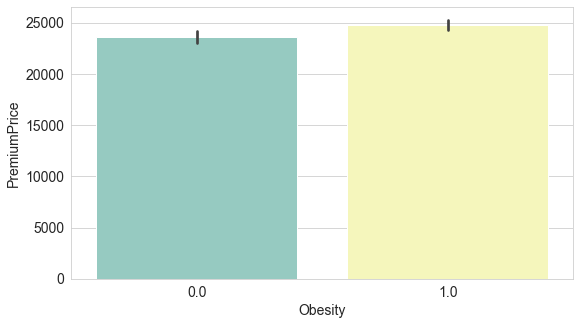

In [19]:
sns.barplot(x=new_df2["Obesity"], y=new_df2["PremiumPrice"])
plt.show()

### D) Visualization for Chronic Disease

#### How Chronic disease affects the price of Medical Premium.

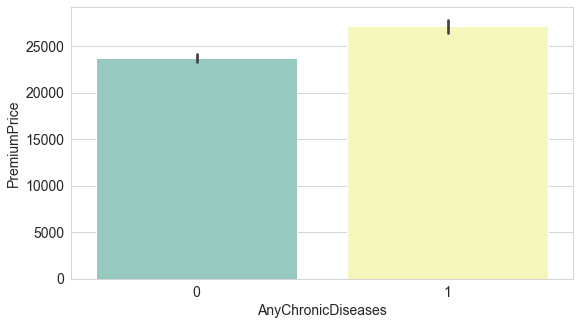

In [93]:
sns.barplot(x=medical_df["AnyChronicDiseases"], y=medical_df["PremiumPrice"])
plt.show()

### E) Visualization for Number of surgeries

#### How Surgery affects the price of Medical Premium.

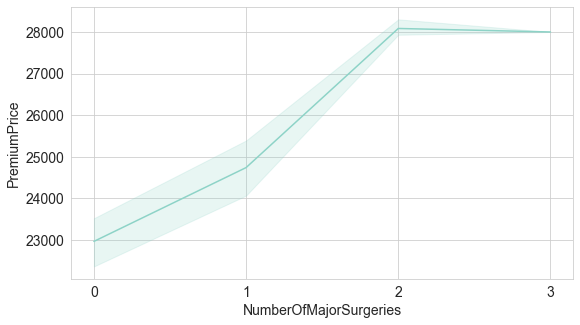

In [80]:
sns.lineplot(x=medical_df["NumberOfMajorSurgeries"], y=medical_df["PremiumPrice"])
plt.xticks(list(medical_df["NumberOfMajorSurgeries"].unique()))
plt.show()

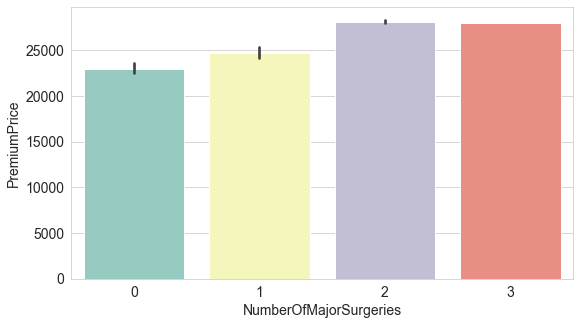

In [63]:
sns.barplot(x=medical_df["NumberOfMajorSurgeries"], y=medical_df["PremiumPrice"])
plt.show()

### F) Visualization for Diabetes

#### How Diabetes affects the price of Medical Premium.

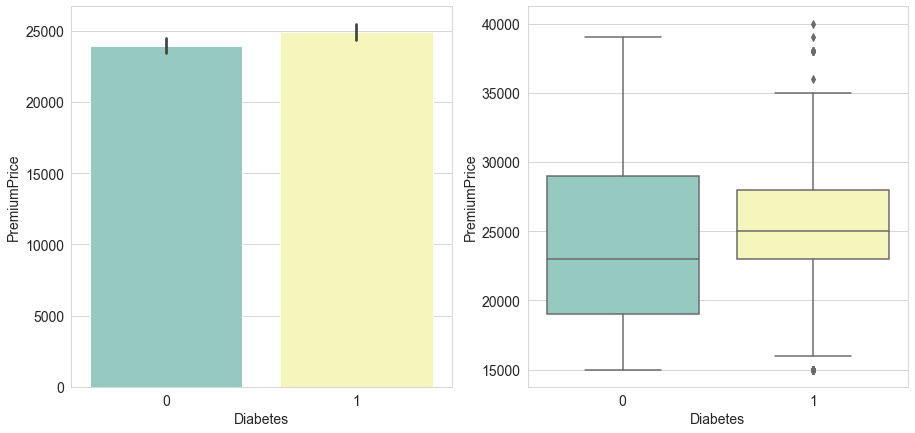

In [9]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(x=medical_df["Diabetes"], y=medical_df["PremiumPrice"],ax=ax[0])
sns.boxplot(x=medical_df["Diabetes"], y=medical_df["PremiumPrice"],ax=ax[1])
plt.xticks(list(medical_df["Diabetes"].unique()))
plt.show()

### G) Visualization for Cancer in Family

#### How having Cancer affects the price of Medical Premium.

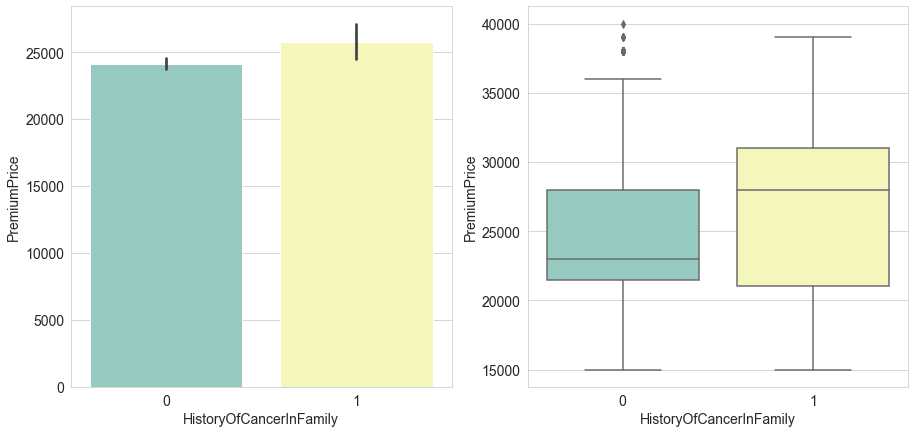

In [102]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.barplot(x=medical_df["HistoryOfCancerInFamily"], y=medical_df["PremiumPrice"],ax=ax[0])
sns.boxplot(x=medical_df["HistoryOfCancerInFamily"], y=medical_df["PremiumPrice"],ax=ax[1])
plt.xticks(list(medical_df["HistoryOfCancerInFamily"].unique()))
plt.show()

### H) Premium price Vs Age, according to diabetes

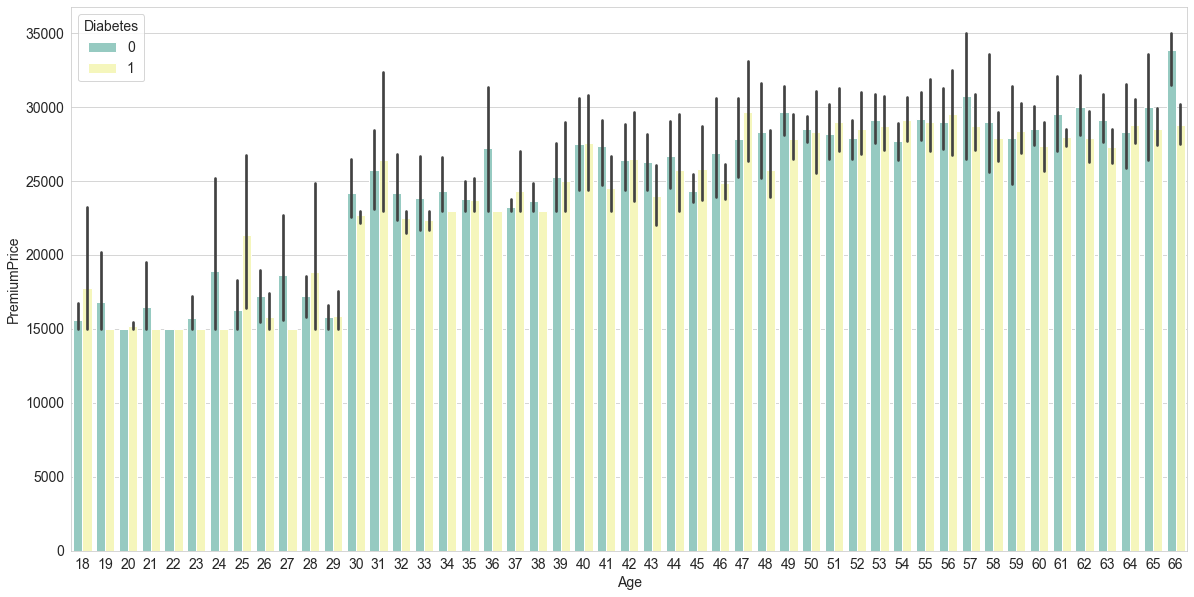

In [105]:
plt.figure(figsize=(20,10))
sns.barplot(x = medical_df['Age'], y = medical_df['PremiumPrice'], hue=medical_df['Diabetes'])
plt.show()

### I) Premium price Vs Age, according to Cancer

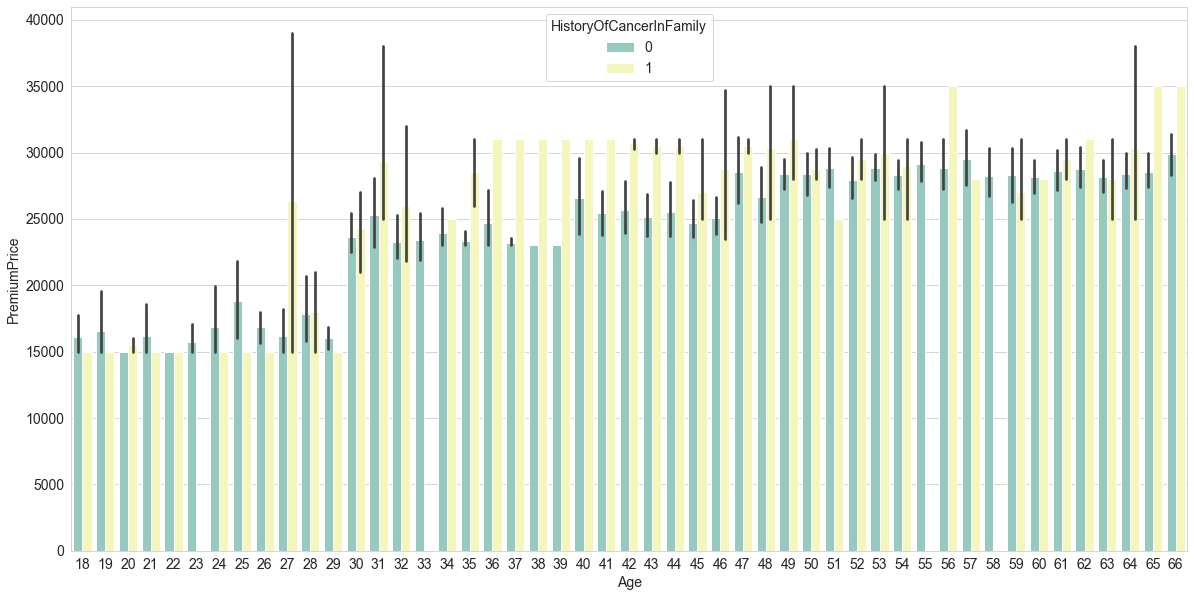

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x = medical_df['Age'], y = medical_df['PremiumPrice'], hue=medical_df["HistoryOfCancerInFamily"])
plt.show()

### J) Premium price Vs Age, according to Surgeries

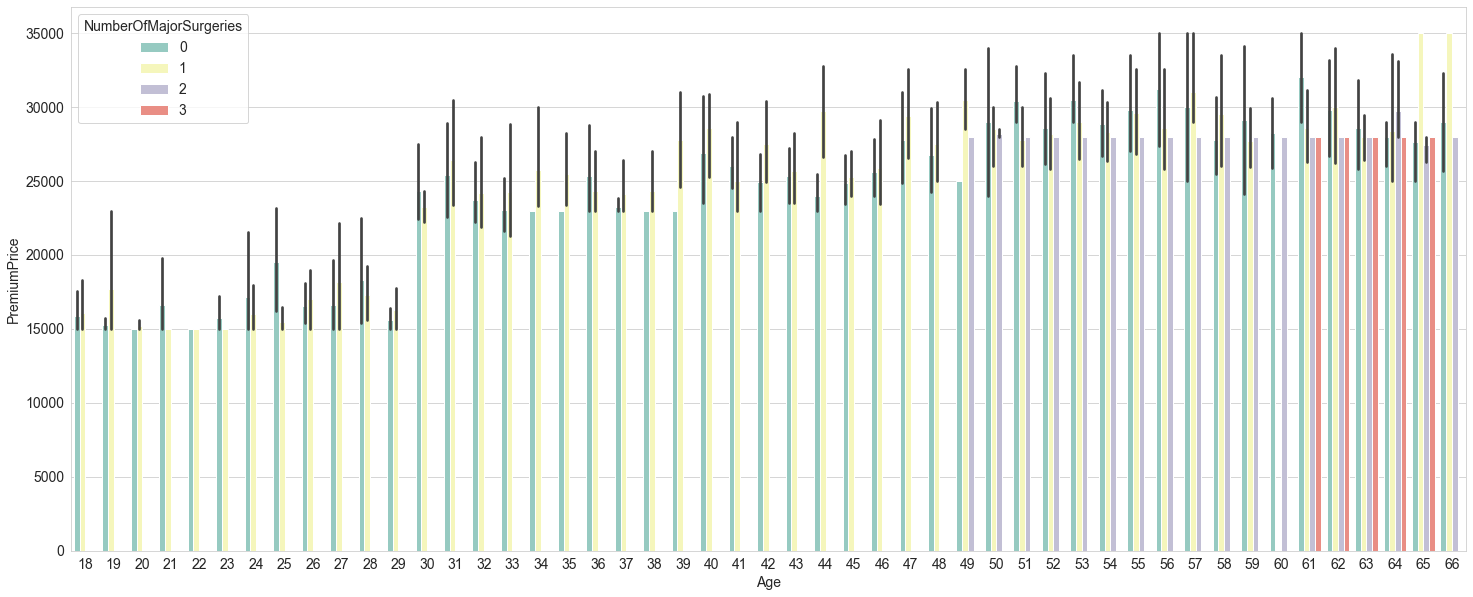

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(x = medical_df['Age'], y = medical_df['PremiumPrice'], hue=medical_df["NumberOfMajorSurgeries"])
plt.show()

### K) Premium price Vs Age, according to Chronic diseases

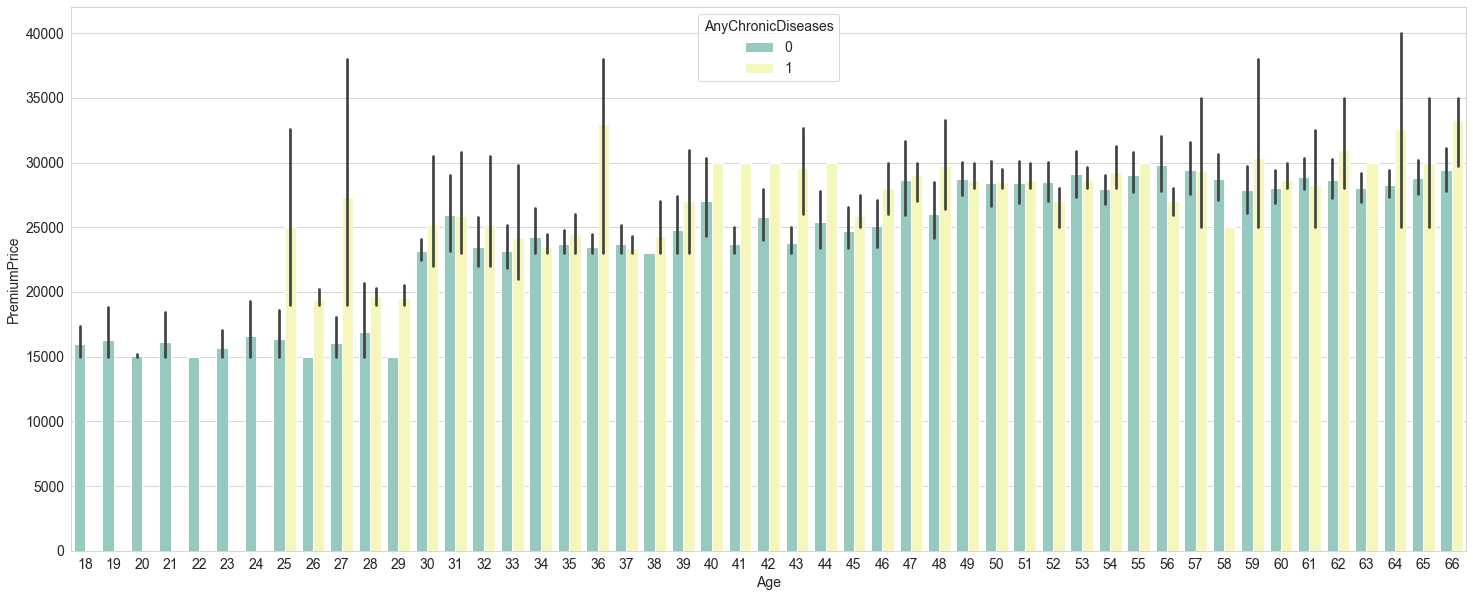

In [13]:
plt.figure(figsize=(25,10))
sns.barplot(x = medical_df['Age'], y = medical_df['PremiumPrice'], hue=medical_df["AnyChronicDiseases"])
plt.show()

### L) Premium price Vs Age, if the person is Obese

In [16]:
new_df = medical_df
# BMI = weight(in kg) / height(in m)**2
new_df.loc[(new_df["Weight"]/(((new_df["Height"])/100)**2)) >= 25,"Obesity"] = 1
new_df.loc[(new_df["Weight"]/(((new_df["Height"])/100)**2)) < 25,"Obesity"] = 0
new_df2 = new_df[["Age","Height","Weight","Obesity","PremiumPrice"]]
new_df2

,Age,Height,Weight,Obesity,PremiumPrice
0,45,155,57,0.0,25000
1,60,180,73,0.0,29000
2,36,158,59,0.0,23000
3,52,183,93,1.0,28000
4,38,166,88,1.0,23000
...,...,...,...,...,...
981,18,169,67,0.0,15000
982,64,153,70,1.0,28000
983,56,155,71,1.0,29000
984,47,158,73,1.0,39000


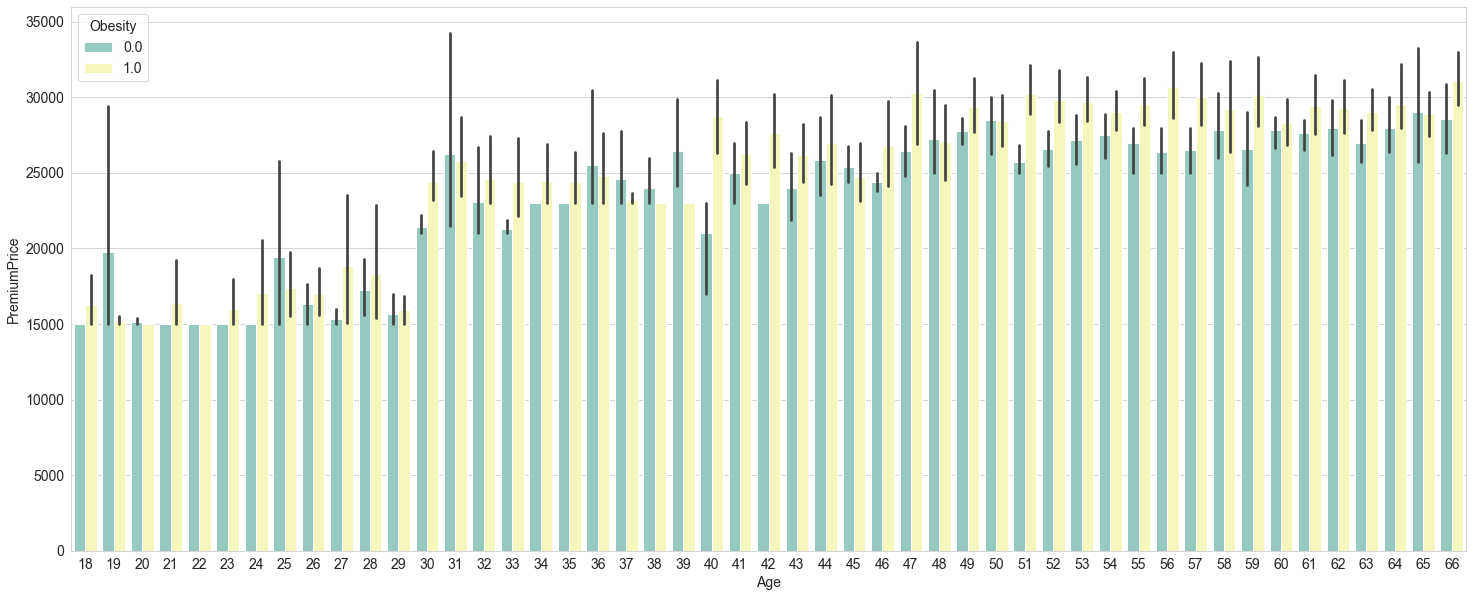

In [17]:
plt.figure(figsize=(25,10))
sns.barplot(x = new_df2['Age'], y = new_df2['PremiumPrice'], hue=new_df2["Obesity"])
plt.show()

## 3) Inferences and Conclusion

> - The User having any chronic disease, Diabetes, Cancer, or Obesity have to pay more Medical Premium.
>
> - The old age user having any Disease, Diabetes, Cancer, or Obesity trends to pay more Medical Premium as compare to user of young age.
>
> - More the user have surgeries, more they trends to pay medical premium, and amount increases even more for old age users.
>
> - The factors like Transplants or Known Allergies barely plays important in amount of medical premium, so they are redundant for our dataset.